## Project 1 – Supermarket Joint Analysis

The dataset contains the following columns:

**Order Information**


- Order ID: Unique identifier for the order.
- Order Date: Date the order was placed.
- Ship Date: Date the order was shipped.
- Ship Mode: Shipping method (e.g., Standard Class, Second Class, etc.).


**Customer Information**

- Customer ID: Unique identifier for the customer.
- Customer Name: Full name of the customer.
- Segment: Customer segment (Consumer, Corporate, Home Office).


**Geographic Information**

- Country: Country ("United States").
- City: Customer's city.
- State: Customer's state.
- Postal Code: Customer's postal code.
- Region: Region (West, East, Central, South).


**Product Information**

- Product ID: Unique identifier for the product.
- Category: Product category (Furniture, Office Supplies, Technology).
- Sub-Category: Product sub-category (Chairs, Phones, Binders, etc.).
- Product Name: Name of the product.

**Sales Information**

- Sales: Total value of the sale (amount paid).
- Quantity: Number of units sold.
- Discount: Discount applied (value between 0 and 1).
- Profit: Profit earned after costs.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_excel(r'C:\Users\c93625b\OneDrive - EXPERIAN SERVICES CORP\Desktop\New folder\VM python\.venv\US Superstore data.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [35]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


**Questions for Our Analysis**

1. What is the total sales volume and total profit?
2. Which products generate the most revenue and which generate the most losses?
3. What are the average profit margins by category and sub-category?
4. What impact do discounts have on profits?
5. Which customer segment generates the most revenue and which generates the most profit?
6. Who are the most valuable customers (highest total spending)?
7. How many unique customers are there by region or segment?
8. Average time between order and shipment
9. Most used and most profitable shipping method
10. Total sales per month

In [36]:
# What is the total sales volume and total profit?

total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()

print(f"Total sales volume is: $ {total_sales}")
print(f"Total Profit: $ {total_profit}")

Total sales volume is: $ 2297200.8603
Total Profit: $ 286397.0217


In [37]:
# Which products generate the most revenue and which generate the most losses?
top_revenue_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_revenue = top_revenue_products.head(10)
top_Loses_products = top_revenue_products.tail(10)

print(f'The 10 top product are: {top_revenue}')
print('________________________________________________________________________________________________')
print(f'The 10 loses product are: {top_Loses_products}')


The 10 top product are: Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64
_____________________________________________

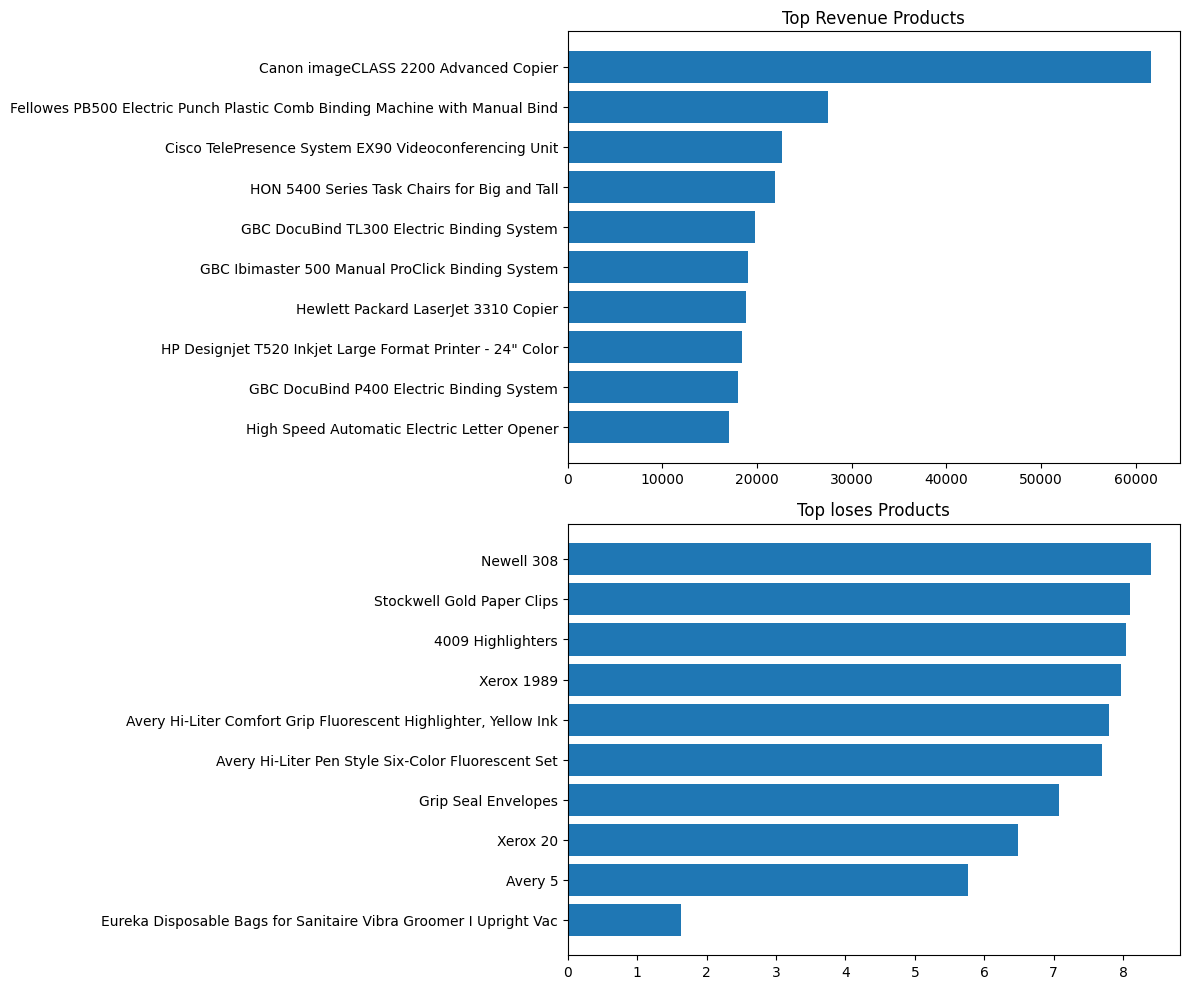

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(12,10))

ax[0].barh(top_revenue.index, top_revenue.values)
ax[0].set_title('Top Revenue Products')
ax[0].invert_yaxis()

ax[1].barh(top_Loses_products.index, top_Loses_products.values)
ax[1].set_title('Top loses Products')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [39]:
# What are the average profit margins by category and sub-category?

data['Margin'] = data['Profit'] / data['Sales'] #crfeating a new column 

margin_cat = data.groupby('Category')['Margin'].mean() * 100
margin_cat

Category
Furniture           3.878353
Office Supplies    13.803029
Technology         15.613805
Name: Margin, dtype: float64

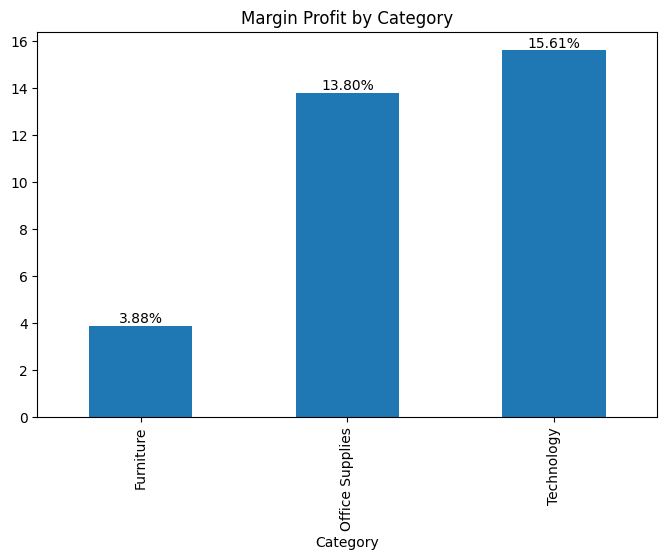

In [40]:
plt.figure(figsize=(8,5))
margin_cat.plot(kind = 'bar')
plt.title('Margin Profit by Category')

for i, v in enumerate(margin_cat):
    plt.text(i,v,f'{v:.2f}%', ha= 'center', va = 'bottom')
#the for works to show the % for each category 
plt.show()

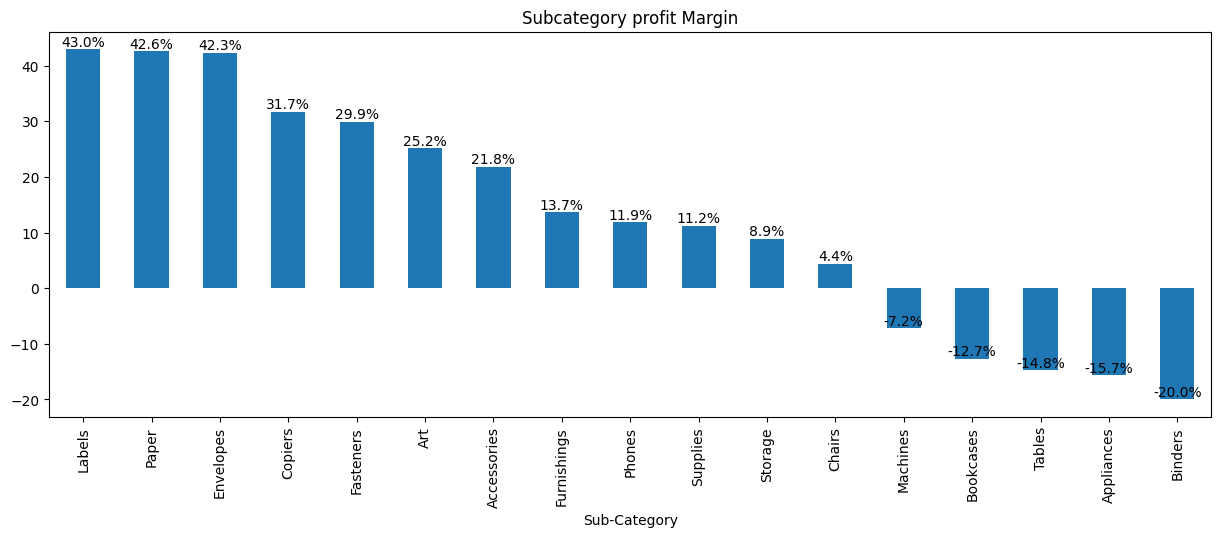

In [41]:
#Subcategory margin profit

margin_subcat = data.groupby('Sub-Category')['Margin'].mean().sort_values(ascending = False) * 100
plt.figure(figsize = (15,5))
margin_subcat.plot(kind="bar")
plt.title('Subcategory profit Margin')

for i,v in enumerate(margin_subcat):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()


In [42]:
# What impact do discounts have on profits?

corr= data['Discount'].corr(data['Profit'])
print(f'Correlation between discounts and profit is: {corr}')

# in this case, if the discount increase the profit decrease since this is a negative value 


Correlation between discounts and profit is: -0.21948745637176834


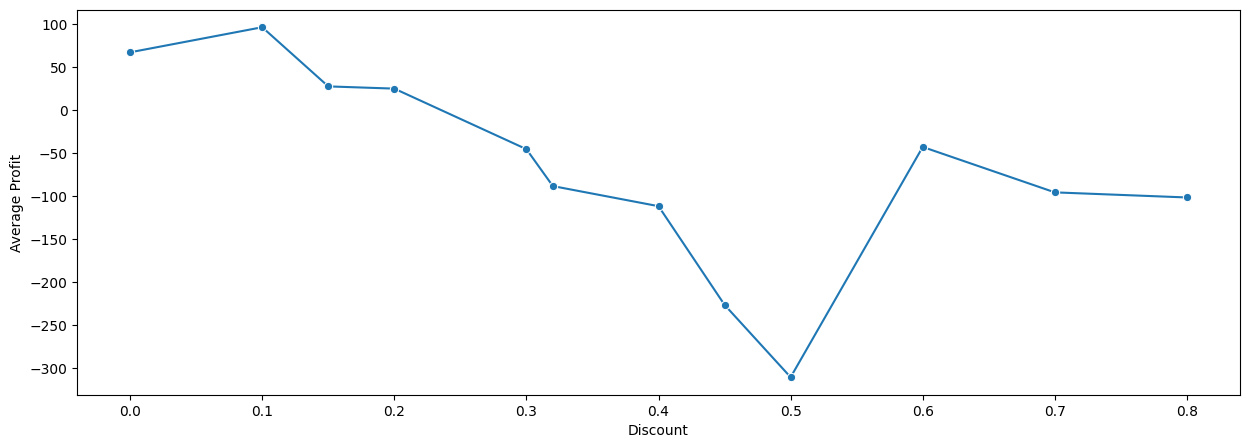

In [43]:
#Im pact of profist depending of the amount of the discount

discount_impact = data.groupby('Discount')['Profit'].mean()
plt.figure(figsize=(15,5))
sns.lineplot(x = discount_impact.index, y = discount_impact.values, marker = 'o')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()


In [44]:
# Which customer segment generates the most revenue and which generates the most profit?

segment_client = (
    data.groupby('Segment')
    .agg({'Sales': 'sum', 'Profit': 'sum'}) # calculate the sum of sales and Profit with the agregation function
    #.reset_index() # este me ayuda a enumerar los segmentos
)
segment_client


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


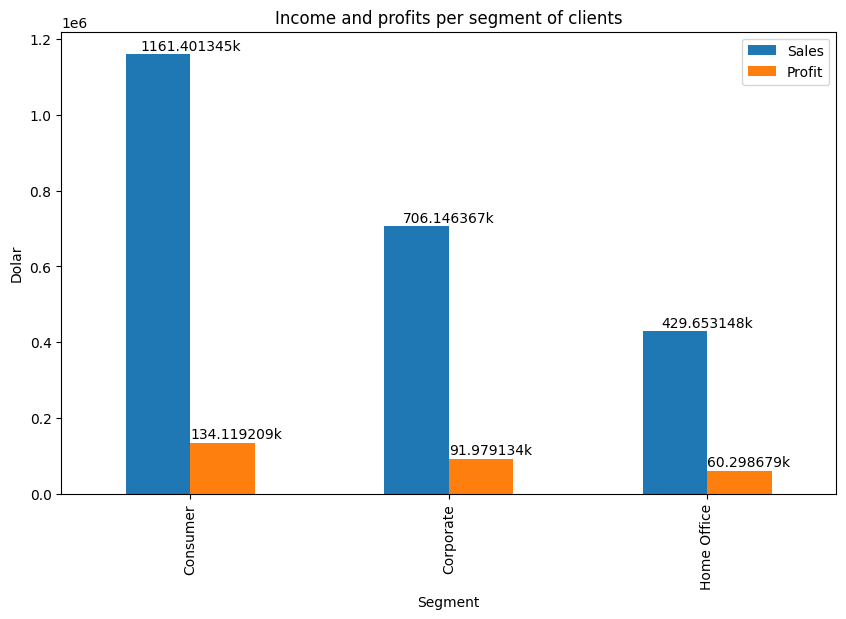

In [45]:
segment_client.plot(kind='bar', figsize=(10,6))
plt.title("Income and profits per segment of clients")
plt.ylabel('Dolar')
plt.xlabel('Segment')
plt.legend(['Sales', 'Profit'])

for i, (sales, profit) in enumerate(zip(segment_client['Sales'], segment_client['Profit'])):
    plt.text(i, sales + 1000, f"{sales/1e3:2f}k", ha='center', va='bottom')
    plt.text(i, profit + 5000, f"{profit/1e3:2f}k", ha='left', va='bottom')

plt.tight_layout
plt.show()


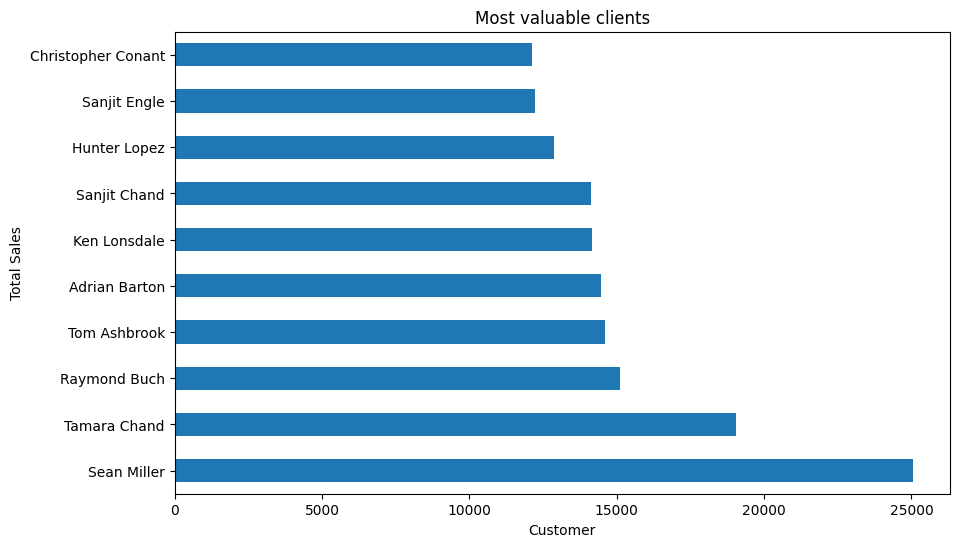

In [46]:
#  Who are the most valuable customers (highest total spending)?
top_consumers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize = (10,6))
top_consumers.plot(kind = 'barh')
plt.title('Most valuable clients')
plt.ylabel('Total Sales')
plt.xlabel('Customer')

plt.show()

In [48]:
# How many unique customers are there by region or segment?

data.groupby('Segment')['Customer ID'].nunique()

Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer ID, dtype: int64

In [50]:
data.groupby('Region')['Customer ID'].nunique()

Region
Central    629
East       674
South      512
West       686
Name: Customer ID, dtype: int64

In [ ]:
# Average time between order and shipment

data['Delivery time'] = (data['Ship Date'] - data['Order Date']).dt.days

print(f'The average time between order and Shipment is:  {data['Delivery time'].mean():2f}')

The average time between order and Shipment is:  3.958175


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
#9. Most used and most profitable shipping method

data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [58]:
data.groupby('Ship Mode')['Profit'].mean().round(1)

Ship Mode
First Class       31.8
Same Day          29.3
Second Class      29.5
Standard Class    27.5
Name: Profit, dtype: float64

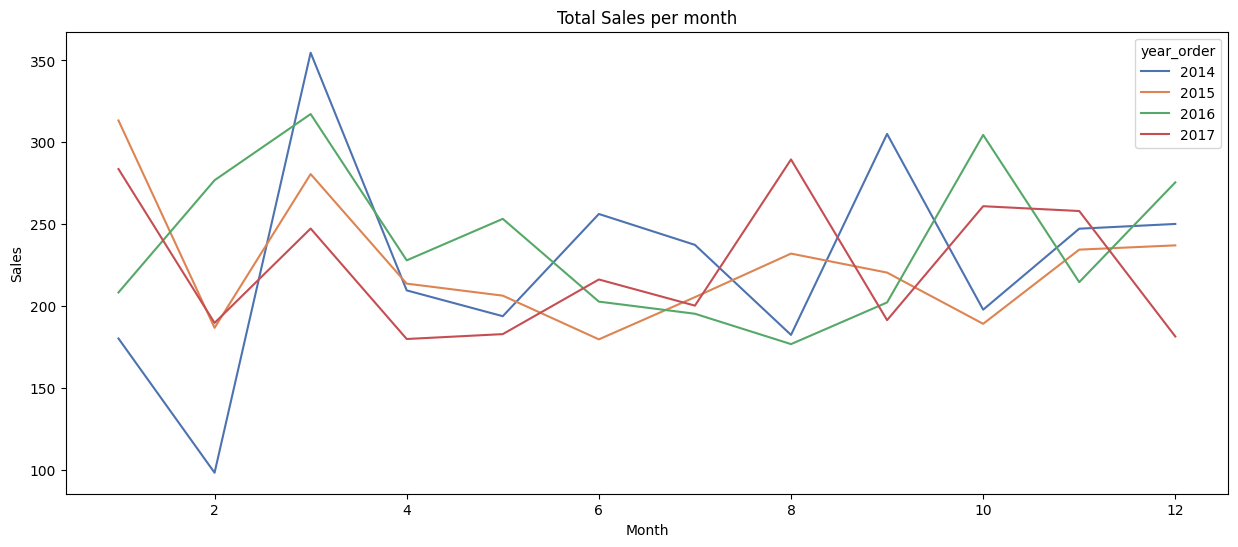

In [62]:
# Total sales per month

data['year_order'] = data['Order Date'].dt.year
data['month_order'] = data['Order Date'].dt.month

plt.figure(figsize=(15,6))
sns.lineplot(x = 'month_order', y='Sales', hue = 'year_order', data=data, palette = 'deep', errorbar = None)
plt.title("Total Sales per month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

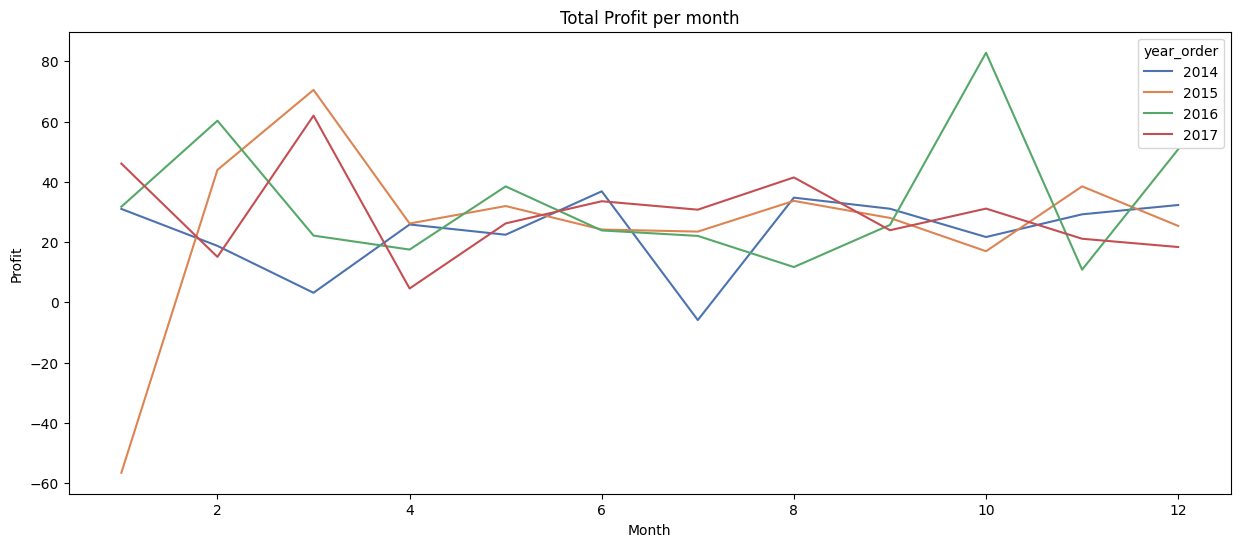

In [63]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'month_order', y='Profit', hue = 'year_order', data=data, palette = 'deep', errorbar = None)
plt.title("Total Profit per month")
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

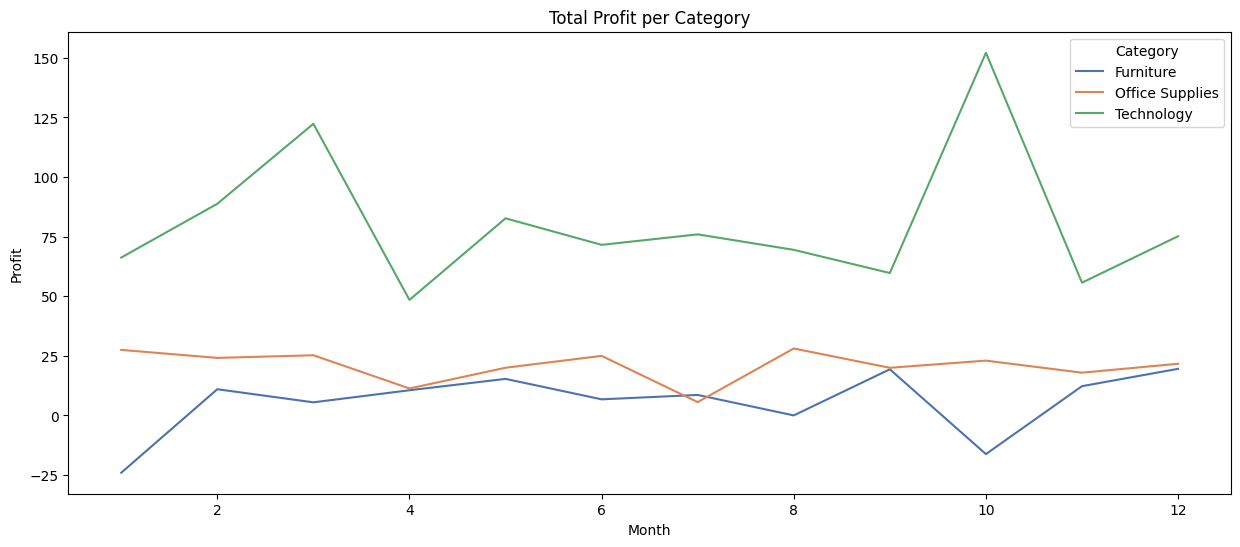

In [65]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'month_order', y = 'Profit', hue = 'Category', data = data, palette = 'deep', errorbar = None)
plt.title("Total Profit per Category")
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()